In [260]:
import numpy as np
import pandas as pd
import seaborn as sns


import csv

import os 
import sklearn
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
data_multi = pd.read_feather('/home/rbarreto/data/scaled-facets-multi-50k-v4.feather')
data_multi.head(5)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,...,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225


In [ ]:
# pd.set_option('display.max_rows', None, 'display.max_columns', None)
# pd.options.display.max_seq_items = 2000
# data_multi.columns

In [ ]:
#we can combine locationlatitude and locationlongitude
#then generate the country for every labeler (must be a function that does this in python)
#then turn it into a categorical variable
#hypothesis: people from more conservative regions...XYZ

In [ ]:
data_multi['has_targets'].value_counts(dropna=False)


In [ ]:
len(data_multi)

In [ ]:
data_multi['dehumanize'].value_counts()

In [ ]:
data_multi['sentiment'].value_counts()

In [ ]:
data_multi.columns.values

In [ ]:
data_multi.shape

In [ ]:
# Hate speech construct items
items = [
    "sentiment",
    "respect",
    "insult",
    "humiliate",
    "status",
    "dehumanize",
    "violence_phys",
    "genocide",
    "attack_defend",
    "hatespeech"]

hate_speech_sum = data_multi[items].sum(axis=1)

In [ ]:
data_multi['hatespeech'].value_counts()


In [ ]:
hate_speech_sum

In [ ]:
data_multi.columns.values

In [ ]:
data_multi['dehumanize'].value_counts()

In [ ]:
data_multi['target_race_1'].value_counts()

In [ ]:
data_multi['platform'].value_counts(dropna=False)

In [ ]:
data_multi['platform'].value_counts(dropna=False)

## What are the different variables that we want to include as features in the linear regression model and why?

1. comment_id bc some comments will be more hateful than others (this should be categorical not nominal) 
2. the different demo characteristics 


What are we trying to predict?
1. Is it the hate speech sum (also do we want to predict for a particular part in the hate speech sum? what if something is washed out) 
2. is it the hate speech score 
3. if it's the hate speech sum, then this goes along with the previous line of inquiry
4. we still need to figure out what is the relationship between the hate speech sum and the hate speech score 
5. can it be the hate speech sum conditional on 


So one way to address this is by making the variable into DVs (target_race_white, target_race_black, and demo_race_X etc)
and including them as controls in the regression 

For traditional social science stuff it’s to show that the strength and direction of the relationship is roughly the same even when you don’t control for certain stuff; So it’s “robust to alternative specifications”; It’s a bit subject to p-hacking but for exploratory analysis

## FULL MODEL 

In [ ]:
features = ['platform', 'locationlatitude', 'target_identity_count', 
            'target_identities_1', 'target_identities_2',
       'target_identities_3', 'target_identities_4',
       'target_identities_5', 'target_identities_6',
       'target_identities_7', 'target_identities_9', 'target_race_1',
       'target_race_2', 'target_race_3', 'target_race_8', 'target_race_4',
       'target_race_5', 'target_race_6', 'target_race_7',
       'target_religion_1', 'target_religion_2',
       'target_religion_4', 'target_religion_5', 'target_religion_8',
       'target_religion_9', 'target_religion_10', 'target_religion_6',
       'target_citizen_5', 'target_citizen_1',
       'target_citizen_2', 'target_citizen_3', 'target_citizen_4', 
       'target_gender_1', 'target_gender_3',
       'target_gender_2', 'target_gender_5', 'target_gender_6',
       'target_gender_7', 'target_gender_4',
       'target_sexuality_1', 'target_sexuality_2', 'target_sexuality_6',
       'target_sexuality_3', 'target_sexuality_5', 'target_age_1', 'target_age_2',
       'target_age_3', 'target_age_4', 'target_age_5', 'target_age_6',
       'target_disability_1', 'target_disability_2',
       'target_disability_3', 'target_disability_4',
       'target_disability_5', 'target_disability_9','target_disability_6', 
       'target_political_1', 'target_political_2', 'target_political_3',
       'target_political_4', 'target_political_5', 'target_political_6',
       'target_political_7', 'target_political_8', 'target_political_9',
       'target_political_10', 'target_political_11', 'demo_gender',
       'demo_trans', 'demo_educ', 'demo_race_ethnicitie_1',
       'demo_race_ethnicitie_2', 'demo_race_ethnicitie_3',
       'demo_race_ethnicitie_4', 'demo_race_ethnicitie_5',
       'demo_race_ethnicitie_8', 'demo_race_ethnicitie_6',
       'demo_race_ethnicitie_7',
       'demo_age', 'demo_income', 'demo_religion_1', 'demo_religion_2',
       'demo_religion_11', 'demo_religion_4', 'demo_religion_5',
       'demo_religion_7', 'demo_religion_8', 'demo_religion_9',
       'demo_religion_10', 'demo_sexual_orien_1',
       'demo_sexual_orien_2', 'demo_sexual_orien_3',
       'demo_sexual_orien_4', 'demo_sexual_orien_5', 'demo_ideology', 'comment_id']





# add: 'demo_race_ethnicitie_DV', 'target_race_DV']

#remove: all the write in text options
#should i actually review them and categorize them or just leave as is?

#'target_race_1', 'target_race_2', 
#             'target_race_3', 'target_race_4', 'target_race_5', 'target_race_6', 'target_race_7']

In [ ]:
data_multi['demo_ideology'].value_counts()

In [ ]:
#turning locationlatitude into a float 
#this one matters because it's about geography
#is it possible to look at what the different geographies represent? 

data_multi['locationlatitude'] = data_multi['locationlatitude'].astype(float)

In [ ]:
print(data_multi['locationlatitude'])

In [ ]:
data_multi['target_identity_count'].value_counts()

In [ ]:
X = data_multi[features]
X

In [ ]:
type(X['comment_id'])

In [ ]:
#convert comment_id to categorical

X['comment_id'] = X['comment_id'].astype('category')

In [ ]:
print(X['comment_id']) #39k categories --> Lasso
#try reference set comments 

In [ ]:
pd.get_dummies(X)
#assign to X
#get rid of comments

In [ ]:
#convert platform to category

X['platform'] = X['platform'].astype('category')


In [ ]:
X['platform']

In [ ]:
#are the other variables that needed to converted to category?

In [ ]:
#get dummy function 

X = pd.get_dummies(X)

In [ ]:
#turning all NaNs into 0s

X.fillna(0, inplace=True)

In [ ]:
X
#what is platform_reference?

In [ ]:
y = hate_speech_sum.values
y

In [ ]:
#object that will do the fitting here 

lasso_var = LassoCV()

In [ ]:
lasso_var.fit(X, y)

In [ ]:
lasso_var.coef_

In [ ]:
lasso_var.score(X, y)

In [ ]:
#create test set 

In [ ]:
# X = data_multi[data_multi = [features].fillna(0)

## Make a reference set

In [ ]:
number_labelers = data_multi['comment_id'].value_counts()

In [ ]:
comment_ids_reference = number_labelers[number_labelers > 50].index

In [ ]:
df_reference = data_multi[data_multi['comment_id'].isin(comment_ids_reference)]

In [ ]:
df_reference['comment_id'].value_counts()

In [ ]:
df_reference['comment_id'].unique().size

df_reference.shape


## RACE MODEL 

Interpreting outputs of regression mode

Should be in the same scale as the original outcome, and to measure error you usually look at Root Mean Squared Error (RMSE)

because there aren’t that many observations too many columns might be why you’re not seeing much

In [ ]:
features = ['target_race_1',
        'demo_race_ethnicitie_3', 'comment_id']

In [ ]:
#removing latitude, not that informative ;non-linear

In [ ]:
X = df_reference[features]
X

In [ ]:
df_reference['platform'].value_counts()

In [ ]:
X = X.fillna(0)

In [ ]:
X['black_labeler_target'] = X['target_race_1'] * X['demo_race_ethnicitie_3']

In [ ]:

# X['platform'] = X['platform'].astype('category')

In [ ]:
type(X['comment_id'])

In [ ]:
X

In [ ]:
# X['locationlatitude'] = X['locationlatitude'].astype('category')

In [ ]:
X['comment_id'] = X['comment_id'].astype('category')

In [ ]:
X.isna().sum()

In [ ]:
X_1 = pd.get_dummies(X)

In [ ]:
X_1

In [ ]:
#try to do regression
#with the hate speech score after IRT 
#as the OUTCOME
#in a way to control for hte hatefulness of the comment? (not sure how it does that tho)

In [ ]:
X.columns


In [ ]:
len(X_1)

In [ ]:
y = df_reference['dehumanize'].values
len(y)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_1, y)

In [ ]:
#split into train and test set 
#train_test_split() 
#stratify (keyword) according to response variable 
#to make sure both train test sets have equal proportion of positive outcomes 
#dehumanize may be more rare

y.mean()
#common in the dataset

In [ ]:
#logistic_regression_CV --> this will regularize logistic regression
#L1 or L2 regularization to see what it's like 

In [ ]:
log_reg.coef_
#coeffs of fitted model on training set as descriptive analysis - not generalizability

#if you're black in this dataset, according to this model, lower probability that you rate that comment as dehumanizing 
#maybe this model doesn't generalize -- or not controlling for enough variables 
#impact of the effect is the exponential of the coefficient
#lower proab by 10% (not big)

#statsmodels import

In [ ]:
X_1.columns

In [ ]:
log_reg.score(X_1, y) 
#accuracy
#this is on the training set


In [ ]:
#use statsmodels to get p-values

In [ ]:
#some of these have been recoded from the Likert scale
#sentiment hatespeech etc
#for the recoded ones, fit a logistic regression 
#hate speech sum slightly more continuous bc addition of many scores (0-20)
#suitable for regression
#switch to classification for 0-1

#dehumanize (0 - 1 coded)
#how well does this generalize, without knowing anything about the text?
#put in a dummy variable for the comment itself (ie holding constant)
#the log regression won't know if the comment itself is hateful or not (reference set comments assigned )
#BERT neural network w/ representation and then stack demographic on top

## StatsModels Attempt

In [ ]:
import statsmodels.api as sm

In [ ]:
! python -m pip install statsmodels

In [ ]:


results = sm.Logit(y, X_1).fit()

In [ ]:
print(results.summary())

#### Let's take out the comment_ids and run the model again
#### Let's make it for the full dataset not just the reference set 


In [ ]:
features = ['target_race_1',
        'demo_race_ethnicitie_3', 'platform']

X_2 = data_multi[features]


In [ ]:
X_2['platform'].value_counts()
print(X_2['platform'])

In [ ]:
X_2['platform'] = X_2['platform'].astype('category')

In [ ]:
X_2['black_labeler_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_3']

In [ ]:
# X_2['white_labeler_black_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_6']

In [ ]:
X_2

In [ ]:
X_2 = pd.get_dummies(X_2)

In [ ]:
X_2 = X_2.fillna(0)

In [ ]:
y = data_multi['dehumanize'].values

In [ ]:
print(len(y))
len(X_2)


In [ ]:
X_2.isna().sum()

In [ ]:
results = sm.Logit(y, X_2).fit()

In [ ]:
print(results.summary())

#### Model for Whtie Labelers on Black Content

In [ ]:
features = ['target_race_1',
        'demo_race_ethnicitie_6', 'platform']

X_2 = data_multi[features]


In [ ]:
X_2['platform'].value_counts()
print(X_2['platform'])

In [ ]:
X_2['platform'] = X_2['platform'].astype('category')

In [ ]:
X_2['white_labeler_black_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_6']

In [ ]:
X_2.columns

In [ ]:
X_2 = pd.get_dummies(X_2)

In [ ]:
X_2 = X_2.fillna(0)

In [ ]:
y = data_multi['dehumanize'].values

In [ ]:
print(len(y))
len(X_2)


In [ ]:
X_2.isna().sum()

In [ ]:
X_2

In [ ]:
results = sm.Logit(y, X_2).fit()

In [ ]:
print(results.summary())

### Including Both White Labeler Black Target and Black Labeler Black Target Interaction Terms

In [ ]:
#sentiment

data_multi['sentiment'].value_counts()


In [ ]:
#turning sentiment into binary

# def likert_binary():
binary_likert = []
for num in data_multi['sentiment']:
    if num == 0:
        binary_likert.append(1)
    if num == 1:
        binary_likert.append(1)
    if num == 2:
        binary_likert.append(1)
    if num == 3:
        binary_likert.append(0)
    if num == 4:
        binary_likert.append(0)
        


In [ ]:
# binary_likert

#dehumanize 0,1,2 = 0; and 3,4 = 1
#for dehumnize, 0 is not dehumanizing, 1 is dehumanizing

#for sentiment 0,1,2 =0; and 3,4=1
#for sentiment binary 0 is strongly positive, 1 is strongly negative

#let's change this so the order agrees with how CS definitions are
#so let' smake 0 strongly neg, and 1 strongly pos 
#so 0,1,2=1, and 3,4=0


In [ ]:
data_multi['sentiment_binary'] = binary_likert

In [ ]:
features = ['target_race_1', 'demo_race_ethnicitie_3', 'sentiment_binary']

X_2 = data_multi[features]

In [ ]:
# X_2['white_labeler_black_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_6']

In [ ]:
X_2['black_labeler_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_3']

In [ ]:
X_2 = pd.get_dummies(X_2)

In [ ]:
X_2 = X_2.fillna(0)

In [ ]:
y = data_multi['dehumanize'].values

In [ ]:
print(len(y))
len(X_2)


In [ ]:
X_2.isna().sum()

In [ ]:
X_2

In [ ]:
results = sm.Logit(y, X_2).fit()

In [ ]:
data_multi['dehumanize'].value_counts()
#what is the direction of dehumanize

#what is the direction in sentiment_binary

In [ ]:
print(results.summary())

#explain likert binary and why for job talk
#distribution 
#cut off point 
#include as histogram (bonus slide)
#change cut off in code and see what happens with analysis
#"robustness" of conclusions to the cut off (my conclusions are robust to the choice of cut off; 
#i can vary the cutoff but conclusin still same)
#tried running it and got the same signal

In [ ]:
#let's change this so the order agrees with how CS definitions are
#so let' smake 0 strongly neg, and 1 strongly pos 
#so 0,1,2=1, and 3,4=0

#dehumanize 0,1,2 = 0; and 3,4 = 1
#for dehumnize, 0 is not dehumanizing, 1 is dehumanizing

In [ ]:
#make a 2 x 2 tableof demo_race_ethnicitie_3 on x and y is dehumanize


#make another one for sentiment_binary - 2x2 table or 2x5 table
#look at -20 and -41 on z 

#plot all the features

#check accuracy / performance overall 
#look at confusion matrix 

In [ ]:
#is reference set the ground truth? confirm
#subset posts for target = black

df_reference = data_multi[data_multi['platform'] == 'reference']
df_reference

### Computation of Performance Metrics for Black Labelers vs non-Black Labelers

For posts target = black 
The question is whether the black labelers in general are more accurate than other labelers (specify majorityy of labelers are black) on black targets 

Subset to posts black target, look at accuracy of black labelers on posts they labeled 
Compute performance measure of choice 

Accuracy or average precision 

average precision is good for when one class is much more common than the other in the evaluation set



In [ ]:
#black targets
df_reference[df_reference['target_race_1'] == 1]

In [ ]:
#black labelers
df_reference[df_reference['demo_race_ethnicitie_3'] == 1]

In [ ]:
X_2 = data_multi[]

In [ ]:
X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y, test_size = .25)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_2, y)

In [ ]:
log_reg.coef_

In [ ]:
log_reg.score(X_2, y)
#accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# don't need to train a model 


In [ ]:
df_reference.columns

In [ ]:

#y pred is what the labelers outside of the reference set predict for comments inside the reference set?
#y true is what the labelers inside the reference set predict for comments in the reference set

#what does this have to do with black and non-black labelers?

#filter the df for content targeting black people
#label dehumanizing or not will be y true labels

#


In [ ]:
df_reference[(df_reference['target_race_1'] == 1) & (df_reference['dehumanize'] == 1)]

In [ ]:
y_true = df_reference['dehumanize'].values

In [ ]:
reference_comment_id = df_reference['comment_id'].to_list()


In [ ]:
#by definition looking at things not in reference
non_ref_comment_id = data_multi[data_multi['platform'] != 'reference']['comment_id'].to_list()

In [ ]:
def intersection(list1, list2):
    list3 = [value for value in list1 if value in list2]
    return list3

In [ ]:
print(intersection(reference_comment_id, non_ref_comment_id))

In [ ]:
list(set(reference_comment_id) & set(non_ref_comment_id))

In [ ]:
#if it's in the reference set, there'll be multiple 

#### Inter Rater Reliability 

In [ ]:
#for overall comments we don't see a change

#but then we when we look at comments about their group

#does this mean that they're more lenient / harsher for their own group?

#how do we interpret this? ie what happens if we ask white pepole on white text 

#what does this mean in terms of recommendations of what to do next

#what are applications for social media companies? 

In [41]:
from sklearn.metrics import cohen_kappa_score


In [39]:
#labeler 1, black labelers, black content on dehumanize specifically

df_white_labeler_black_target = data_multi[(data_multi['demo_race_ethnicitie_3'] == 1) & (data_multi['target_race_1'] == 1)]

labeler_1 = df_white_labeler_black_target['dehumanize'].values

len(labeler_1)


2292

In [40]:
#labeler 2, white labelers, black content on dehumanize specifically
df_black_labeler_target = data_multi[(data_multi['demo_race_ethnicitie_6'] == 1) & (data_multi['target_race_1'] == 1)]

labeler_2 = df_black_labeler_target['dehumanize'].values

len(labeler_2)

18545

In [ ]:
sklearn.metrics.cohen_kappa_score(labeler_1, labeler_2)

#### Creating a sentiment analyzer

In [192]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rbarreto/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [193]:
! pip install nltk

In [194]:
sia.polarity_scores('Wow, NLTK is really powerful!')

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [195]:
# for text in data_multi['predict_text']:
#     print(sia.polarity_scores(text))

In [196]:
data_multi['predict_text'][0]

'Yes indeed. She sort of reminds me of the elder lady that played the part in the movie "Titanic" who was telling her story!!! And I wouldn\'t have wanted to cover who I really am!! I would be proud!!!! WE should be proud of our race no matter what it is!!'

In [197]:
dictionary_sentiment = {}

sia.polarity_scores(data_multi['predict_text'][0])

{'neg': 0.04, 'neu': 0.772, 'pos': 0.188, 'compound': 0.8057}

In [198]:
data_multi['polarity'] = data_multi['predict_text'].map(lambda x:sia.polarity_scores(x))

In [199]:
data_multi[['comment_id', 'polarity']]

,comment_id,polarity
0,47777,"{'neg': 0.04, 'neu': 0.772, 'pos': 0.188, 'com..."
1,39773,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp..."
2,47101,"{'neg': 0.172, 'neu': 0.68, 'pos': 0.148, 'com..."
3,43625,"{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp..."
4,12538,"{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'comp..."
...,...,...
135551,37080,"{'neg': 0.103, 'neu': 0.816, 'pos': 0.082, 'co..."
135552,22986,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
135553,21008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
135554,22986,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [200]:
from random import shuffle

def is_positive(text:str) -> bool:
    """True if text has positive compound statement, False otherwise"""
    return sia.polarity_scores(text)["compound"] > 0

for text in data_multi['predict_text'][:10]:
    print(">", is_positive(text), text)

> True Yes indeed. She sort of reminds me of the elder lady that played the part in the movie "Titanic" who was telling her story!!! And I wouldn't have wanted to cover who I really am!! I would be proud!!!! WE should be proud of our race no matter what it is!!
> True The trans women reading this tweet right now is beautiful
> False Question: These 4 broads who criticize America, what country did they flee to get here? And now they want to make OUR America like THEIR former HELL HOLE. I don't think so!!!!!!!!!!  Let them explain their GRATITUDE for letting them in OUR country.
> True It is about time for all illegals to go back to their country of origin and keep our freeway open and prevent heavy traffic.
> False For starters bend over the one in pink and kick that ass and pussy to get a taste until she's begging for a dick inside her.
> False Sounds like the kinda wholsesome life I'd die for ❤️ never met any black Lesbians before so i guess you're my first ever.
> False Who the fuck 

In [201]:
data_multi['polarity_binary'] = data_multi['predict_text'].map(lambda x:is_positive(x))

In [202]:
data_multi['polarity_binary'].value_counts(dropna=False)

False    94209
True     41347
Name: polarity_binary, dtype: int64

In [203]:
labels_polarity = []
for boolean in data_multi['polarity_binary']:
    if boolean == True:
        labels_polarity.append(1)
    else:
        labels_polarity.append(0)

In [204]:
# labels_polarity
#1 is positive, 0 is negative

In [205]:
data_multi['labels_polarity'] = labels_polarity

In [206]:
data_multi['labels_polarity'].value_counts()

0    94209
1    41347
Name: labels_polarity, dtype: int64

### Training Model with New Sentiment

In [207]:
features = ['target_race_1', 'demo_race_ethnicitie_3', 'labels_polarity']

X_2 = data_multi[features]

In [208]:
X_2['black_labeler_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_3']

<ipython-input-208-0004f9be48da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2['black_labeler_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_3']


In [209]:
X_2 = pd.get_dummies(X_2)

In [210]:
X_2 = X_2.fillna(0)

In [211]:
y = data_multi['dehumanize'].values

In [212]:
results = sm.Logit(y, X_2).fit()

Optimization terminated successfully.
         Current function value: 0.621177
         Iterations 5


In [213]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               135556
Model:                          Logit   Df Residuals:                   135552
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Sep 2021   Pseudo R-squ.:                 0.05631
Time:                        19:13:08   Log-Likelihood:                -84204.
converged:                       True   LL-Null:                       -89229.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
target_race_1              0.0608      0.015      4.161      0.000       0.032       0.089
demo_race_ethnicitie_3    -0.2597      0.021    -12.412      0.000      -0.301      -0.219
labe

### Making the race model bigger AND adding the train / test split 

In [214]:
X_2 = data_multi

In [215]:
#adding the other racial groups in demographics and racial groups in target, except for leaving one out 
#should i have an interaction term for each of the demo - target identity pairs?
#only the ones that i care about 

#can i compare these sizes as effect sizes?
#black labeler, black content
#white labeler, black content

#black labeler, white content
#white labeler, white content

#i could also put altogether BIPOC vs white - with caveats Claudia gave

features = ['target_race_1', 'target_race_2', 'target_race_3', 'target_race_4', 'target_race_5', 'target_race_6',
            'demo_race_ethnicitie_1', 'demo_race_ethnicitie_2', 'demo_race_ethnicitie_3', 'demo_race_ethnicitie_4',
            'demo_race_ethnicitie_5', 'demo_race_ethnicitie_6', 'black_labeler_black_target', 'white_labeler_black_target',
            'labels_polarity']

# 'black_labeler_white_target', 'white_labeler_white_target',

In [216]:
#black labeler, black target
X_2['black_labeler_black_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_3']

#white labeler, black target

X_2['white_labeler_black_target'] = X_2['target_race_1'] * X_2['demo_race_ethnicitie_6']

#black labeler, white target

X_2['black_labeler_white_target'] = X_2['target_race_6'] * X_2['demo_race_ethnicitie_3']

#white labeler, white target

X_2['white_labeler_white_target'] = X_2['target_race_6'] * X_2['demo_race_ethnicitie_6']

In [217]:
X_2['white_labeler_black_target'].value_counts()

1.0    18545
Name: white_labeler_black_target, dtype: int64

In [218]:
X_2['black_labeler_black_target'].value_counts()

1.0    2292
Name: black_labeler_black_target, dtype: int64

In [219]:
X_2['black_labeler_white_target'].value_counts()

1.0    1086
Name: black_labeler_white_target, dtype: int64

In [245]:
X_2['white_labeler_white_target'].value_counts()

KeyError: 'white_labeler_white_target'

In [221]:
X_2 = data_multi[features]

In [222]:
X_2.columns.values

array(['target_race_1', 'target_race_2', 'target_race_3', 'target_race_4',
       'target_race_5', 'target_race_6', 'demo_race_ethnicitie_1',
       'demo_race_ethnicitie_2', 'demo_race_ethnicitie_3',
       'demo_race_ethnicitie_4', 'demo_race_ethnicitie_5',
       'demo_race_ethnicitie_6', 'black_labeler_black_target',
       'white_labeler_black_target', 'labels_polarity'], dtype=object)

In [223]:
log_reg = LogisticRegression()

In [224]:
 data_multi['humiliate'].value_counts()

0.0    65896
1.0    39382
2.0    30278
Name: humiliate, dtype: int64

In [225]:
y = data_multi['dehumanize'].values
y

array([0., 0., 1., ..., 0., 0., 0.])

In [226]:
X_2 = pd.get_dummies(X_2)
X_2

,target_race_1,target_race_2,target_race_3,target_race_4,target_race_5,target_race_6,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_6,black_labeler_black_target,white_labeler_black_target,labels_polarity
0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1
135552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0
135553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0
135554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0


In [227]:
X_2 = X_2.fillna(0)

In [228]:
# X_2.isna()

In [229]:
#making train test split here 
X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y, test_size = .25)

In [230]:
log_reg.fit(X_2_train, y_train)

LogisticRegression()

In [270]:
log_reg.coef_

array([[ 0.37448136,  0.71522213,  0.54765703, -1.12619581, -0.7551878 ,
        -0.49800652, -0.13830143, -0.08722556, -0.08437877, -0.03273767,
        -0.3335996 , -0.03984704,  0.1077433 , -0.07282033, -1.35331983]])

In [252]:
#let's look at the test set here to see if the model is any good 

print(log_reg.score(X_2_train, y_train))

0.6495224605820965


In [253]:
print(log_reg.score(X_2_test, y_test))

0.6545486736109062


In [273]:
1 - y_test.mean()

0.6334798902298682

In [274]:
1 - y_train.mean()

0.6306176045324441

In [ ]:
#observational study 
#step 1: correlational analysis (in race fairness notebook)
#step 2: constructing model -- encode those differences in coefficients but also if patterns generalizable


In [275]:
data_multi.columns.values

#add severity differences 
#gender bc good reason to inclde in model 
#variance that can be attributed to the comments (sentimemnt)
#multi level model - bayesian model tht accounts for clusters
#coefs structured 
#cluster is a comment 
#similar to IRT


#for next hate speech meeting: 
#L2 regression --> generalization ** 
#logisticregressionCV (cross validation)
#look through NLTK for other ways of measuring
#Lasso for logit 

#l2 penalize
#l1 penalize - problems in inducing bias in fitted paramters (more problematic for intp)
#add comment id or word embedding
#restriction: reference set comments --> abudance of annotators 



#after hate speech meeting
#randomforest --> feature importance, shackeley values ...fitted parameters
#github repo w/ shack values 
#feature importance unidirectional 
#gradient boosted trees



array(['sentiment', 'respect', 'insult', 'humiliate', 'status',
       'dehumanize', 'violence_phys', 'genocide', 'attack_defend',
       'hatespeech', 'comment_id', 'platform', 'uid', 'predict_text',
       'measure', 'std_err', 'num_ratings', 'weight', 'has_targets',
       'target_identity_count', 'labeler_id', 'rater_measure',
       'rater_infitms', 'rater_outfitms', 'infitms', 'outfitms',
       'target_identities_1', 'target_identities_2',
       'target_identities_3', 'target_identities_4',
       'target_identities_5', 'target_identities_6',
       'target_identities_7', 'target_identities_9', 'target_race_1',
       'target_race_2', 'target_race_3', 'target_race_8', 'target_race_4',
       'target_race_5', 'target_race_6', 'target_race_7',
       'target_race_7_text', 'target_religion_1', 'target_religion_2',
       'target_religion_4', 'target_religion_5', 'target_religion_8',
       'target_religion_9', 'target_religion_10', 'target_religion_6',
       'target_religion_6_te

In [266]:
#feature importance

logit_data = pd.concat([pd.DataFrame(X_2.columns), 
                             pd.DataFrame(np.transpose(log_reg.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])



Text(0.5, 1.0, 'Top Logit Coefficients')

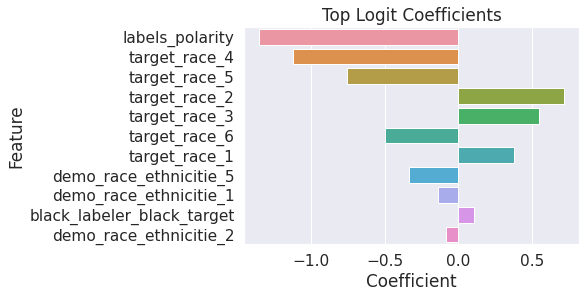

In [269]:
sns.barplot(x = 'Coefficient', y = 'Feature', data= logit_data.nlargest(11, 'abs_coef')).set_title('Top Logit Coefficients')


In [267]:
logit_data

,Feature,Coefficient,abs_coef
0,target_race_1,0.374481,0.374481
1,target_race_2,0.715222,0.715222
2,target_race_3,0.547657,0.547657
3,target_race_4,-1.126196,1.126196
4,target_race_5,-0.755188,0.755188
5,target_race_6,-0.498007,0.498007
6,demo_race_ethnicitie_1,-0.138301,0.138301
7,demo_race_ethnicitie_2,-0.087226,0.087226
8,demo_race_ethnicitie_3,-0.084379,0.084379
9,demo_race_ethnicitie_4,-0.032738,0.032738


In [257]:
#predictions on the validation set 

y_pred = log_reg.predict(X_2_test)

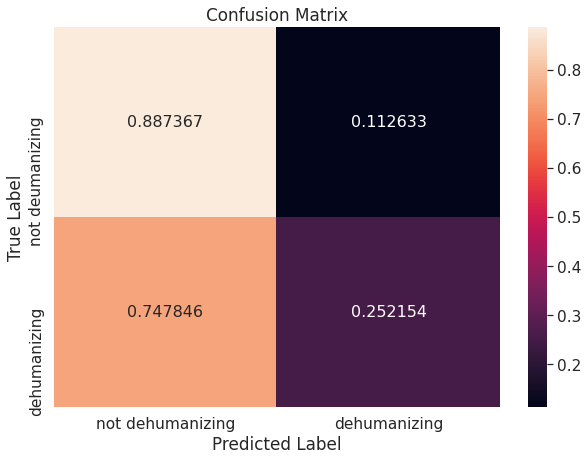

In [263]:
cf_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')

df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

df_cm = df_cm.rename(index=str, columns={0: 'not dehumanizing', 1:'dehumanizing'})

df_cm.index = ['not deumanizing', 'dehumanizing']
plt.figure(figsize = (10, 7))

sns.set(font_scale = 1.4) #for label size

sns.heatmap(df_cm, annot=True, annot_kws={'size': 16}, fmt= 'g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [232]:
results = sm.Logit(y_train, X_2_train).fit()

Optimization terminated successfully.
         Current function value: 0.611535
         Iterations 5


In [251]:
print(results.summary())

#can i compare size of the coefficients here?
#or look at size of z?

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               101667
Model:                          Logit   Df Residuals:                   101652
Method:                           MLE   Df Model:                           14
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                 0.07150
Time:                        09:57:02   Log-Likelihood:                -62173.
converged:                       True   LL-Null:                       -66961.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
target_race_1                  0.2796      0.049      5.680      0.000       0.183       0.376
target_race_2                  0.7087      0.031     23.055      0.000       0.648 

In [247]:
data_multi['insult'].value_counts()

3.0    44153
2.0    39673
0.0    33143
1.0    18587
Name: insult, dtype: int64

In [241]:
data_multi.columns.values


array(['sentiment', 'respect', 'insult', 'humiliate', 'status',
       'dehumanize', 'violence_phys', 'genocide', 'attack_defend',
       'hatespeech', 'comment_id', 'platform', 'uid', 'predict_text',
       'measure', 'std_err', 'num_ratings', 'weight', 'has_targets',
       'target_identity_count', 'labeler_id', 'rater_measure',
       'rater_infitms', 'rater_outfitms', 'infitms', 'outfitms',
       'target_identities_1', 'target_identities_2',
       'target_identities_3', 'target_identities_4',
       'target_identities_5', 'target_identities_6',
       'target_identities_7', 'target_identities_9', 'target_race_1',
       'target_race_2', 'target_race_3', 'target_race_8', 'target_race_4',
       'target_race_5', 'target_race_6', 'target_race_7',
       'target_race_7_text', 'target_religion_1', 'target_religion_2',
       'target_religion_4', 'target_religion_5', 'target_religion_8',
       'target_religion_9', 'target_religion_10', 'target_religion_6',
       'target_religion_6_te

In [243]:
data_multi['target_identities_1'].value_counts()

1.0    48359
Name: target_identities_1, dtype: int64

In [234]:
X_2['demo_race_ethnicitie_1'].value_counts()

0.0    132920
1.0      2636
Name: demo_race_ethnicitie_1, dtype: int64

In [235]:
X_2['target_race_1'].value_counts()

0.0    112657
1.0     22899
Name: target_race_1, dtype: int64

In [236]:
X_2['target_race_2'].value_counts()

0.0    127059
1.0      8497
Name: target_race_2, dtype: int64

In [237]:
X_2['target_race_3'].value_counts()

0.0    128531
1.0      7025
Name: target_race_3, dtype: int64

In [246]:
X_2['target_race_4'].value_counts()

0.0    132737
1.0      2819
Name: target_race_4, dtype: int64

In [239]:
X_2['target_race_5'].value_counts()

0.0    133198
1.0      2358
Name: target_race_5, dtype: int64

In [240]:
X_2['target_race_6'].value_counts()

0.0    125759
1.0      9797
Name: target_race_6, dtype: int64

### NOT FOR CAUSAL INFERENCE, JUST FOR EXPLORATION 

In [187]:
data_multi

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,...,locationlongitude,identity,hypothesis,polarity,polarity_binary,labels_polarity,black_labeler_black_target,white_labeler_black_target,black_labeler_white_target,white_labeler_white_target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-77.39420318603515625,0.917681,-1.130178,"{'neg': 0.04, 'neu': 0.772, 'pos': 0.188, 'com...",True,1,NaN,1.0,NaN,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-96.83170318603515625,0.918119,-1.146973,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",True,1,NaN,NaN,NaN,NaN
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,...,-76.53890228271484375,0.985910,-0.207369,"{'neg': 0.172, 'neu': 0.68, 'pos': 0.148, 'com...",False,0,NaN,NaN,NaN,NaN
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,-94.4727020263671875,0.969761,-0.055536,"{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp...",True,1,NaN,NaN,NaN,NaN
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,...,-79.64679718017578125,0.935462,0.104225,"{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'comp...",False,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-81.41970062255859375,0.929974,-0.036250,"{'neg': 0.103, 'neu': 0.816, 'pos': 0.082, 'co...",True,1,NaN,NaN,NaN,NaN
135552,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-85.14620208740234375,0.934007,-0.974684,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",False,0,NaN,NaN,NaN,NaN
135553,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-84.11810302734375,0.871521,-0.491960,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",False,0,NaN,NaN,NaN,NaN
135554,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-79.54180145263671875,0.934007,-0.974684,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",False,0,NaN,NaN,NaN,NaN


In [188]:
X = data_multi[features]

In [189]:
#step 2: include features like DV for black, not black (later maybe smaller racial groupings)



In [190]:
#fit model